<a href="https://colab.research.google.com/github/damianleandro/My-first-works-for-the-Master-/blob/main/PREDICT_INDUSTRIAL_2_MODELO_S_(POLY_vs_XGB)_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## COMPETENCIA DE MODELOS 


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# imports time series
import pandas as pd
import numpy as np

# plots
import matplotlib.pyplot as plt
%matplotlib inline

# para calculas métricas del modelo
from sklearn.metrics import mean_squared_error

# misc
import os
import time
import itertools
import warnings
warnings.filterwarnings("ignore")

# apartado ts
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, ExponentialSmoothing, Holt

from prophet import Prophet


import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import rcParams
import seaborn as sns
import missingno as msno
# Preprocessing
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from scipy import stats
# Modelizacion
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
# Evaluacion
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_score
from sklearn import metrics
from xgboost import plot_tree
# #MODEL COMPETITION
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor



from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")
import pickle
plt.rcParams["figure.figsize"] = [10,6]


#!pip install shap

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/DataSetIndustrial/BARCELONA.csv')
df.head()

,Unnamed: 0,FECHA,USO,CONSUMO,ID_CONTADOR,LOCALIDAD
0,0,2019-02-14,INDUSTRIAL,2,838,BARCELONA
1,1,2019-02-14,INDUSTRIAL,79,1207,BARCELONA
2,2,2019-02-17,INDUSTRIAL,12,1135,BARCELONA
3,3,2019-01-06,INDUSTRIAL,31,1286,BARCELONA
4,4,2019-01-06,INDUSTRIAL,184,947,BARCELONA


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1606895 entries, 0 to 1606894
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype 
---  ------       --------------    ----- 
 0   Unnamed: 0   1606895 non-null  int64 
 1   FECHA        1606895 non-null  object
 2   USO          1606895 non-null  object
 3   CONSUMO      1606895 non-null  int64 
 4   ID_CONTADOR  1606895 non-null  int64 
 5   LOCALIDAD    1606895 non-null  object
dtypes: int64(3), object(3)
memory usage: 73.6+ MB


In [ ]:
df[df['CONSUMO']<0]

,Unnamed: 0,FECHA,USO,CONSUMO,ID_CONTADOR,LOCALIDAD
6374,6374,2019-01-13,INDUSTRIAL,-9,1007,BARCELONA
12074,12074,2019-01-17,INDUSTRIAL,-271998,1791,BARCELONA
12718,12718,2019-02-24,INDUSTRIAL,-2,770,BARCELONA
12914,12914,2019-01-01,INDUSTRIAL,-7,1007,BARCELONA
13454,13454,2019-01-27,INDUSTRIAL,-3,1007,BARCELONA
...,...,...,...,...,...,...
1597336,1597336,2021-08-01,INDUSTRIAL,-3,3363,BARCELONA
1598446,1598446,2021-11-30,INDUSTRIAL,-1,2447,BARCELONA
1599736,1599736,2021-12-12,INDUSTRIAL,-1,2747,BARCELONA
1602238,1602238,2021-10-21,INDUSTRIAL,-5253204,1575,BARCELONA


In [ ]:
df=df[df['CONSUMO']>=0]

In [ ]:
df['FECHA'] = pd.to_datetime(df['FECHA'], format = "%Y-%m-%d")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603077 entries, 0 to 1606894
Data columns (total 6 columns):
 #   Column       Non-Null Count    Dtype         
---  ------       --------------    -----         
 0   Unnamed: 0   1603077 non-null  int64         
 1   FECHA        1603077 non-null  datetime64[ns]
 2   USO          1603077 non-null  object        
 3   CONSUMO      1603077 non-null  int64         
 4   ID_CONTADOR  1603077 non-null  int64         
 5   LOCALIDAD    1603077 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(2)
memory usage: 85.6+ MB


In [ ]:
df.groupby(["ID_CONTADOR"]).sum()

,Unnamed: 0,CONSUMO
ID_CONTADOR,,
0,138052230,197322
1,134969124,96486
2,414677963,447758
3,699848470,119434
4,109583257,14438
...,...,...
3465,73145476,43798
3466,39839652,232816
3467,28216012,1105918


## Cambio de fecha a formato días

In [ ]:
# def transformar_fecha(df, col):
#     df[col + '_NOMBREDIA'] = df[col].dt.day_name()
#     df[col + '_DIA'] = df[col].dt.day
#     df[col + '_MES'] = df[col].dt.month.map(lambda x: calendar.month_name[x])
#     df[col + '_AÑO'] = df[col].dt.year
#     del df[col]

# # Llamamos a la función para transformar la columna de fecha
# transformar_fecha(df, 'FECHA')

# # Mostramos el resultado
# df.head()

In [ ]:
for col in ['FECHA']:
    #bcn_comp[col + '_HORA'] = bcn_comp[col].dt.hour
    df[col + '_NOMBREDIA'] = df[col].dt.day_name()
    ##O .dt.weekday_name
    df[col + '_DIA'] = df[col].dt.day
    #bcn_comp[col + '_SEMANA'] = bcn_comp[col].dt.week
    df[col + '_MES'] = df[col].dt.month
    df[col + '_AÑO'] = df[col].dt.year
    del df[col]
df.head()

,Unnamed: 0,USO,CONSUMO,ID_CONTADOR,LOCALIDAD,FECHA_NOMBREDIA,FECHA_DIA,FECHA_MES,FECHA_AÑO
0,0,INDUSTRIAL,2,838,BARCELONA,Thursday,14,2,2019
1,1,INDUSTRIAL,79,1207,BARCELONA,Thursday,14,2,2019
2,2,INDUSTRIAL,12,1135,BARCELONA,Sunday,17,2,2019
3,3,INDUSTRIAL,31,1286,BARCELONA,Sunday,6,1,2019
4,4,INDUSTRIAL,184,947,BARCELONA,Sunday,6,1,2019


In [ ]:
df_prep = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Recta final/Más data/Precipitaciones .csv", sep=";", encoding="ISO-8859-1")

df_prep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Mes            36 non-null     int64  
 1   Año            36 non-null     int64  
 2   Precipitación  36 non-null     float64
 3   Unnamed: 3     0 non-null      float64
 4   Unnamed: 4     0 non-null      float64
dtypes: float64(3), int64(2)
memory usage: 1.5 KB


In [ ]:
df_prep.drop(["Unnamed: 3",	"Unnamed: 4"], axis=1, inplace=True)

In [ ]:
df_prep.sample(2)

,Mes,Año,Precipitación
20,9,2020,60.2
3,4,2019,36.2


In [ ]:
df_temp = pd.read_csv("/content/gdrive/MyDrive/Colab Notebooks/Recta final/Más data/Temperatura_Media.csv", sep=";", encoding="ISO-8859-1")

In [ ]:
df_temp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Mes         36 non-null     int64  
 1   Año         36 non-null     int64  
 2   Temp_Media  36 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 992.0 bytes


In [ ]:
# Create a new date column in the first dataset
df_temp['fecha'] = pd.to_datetime(df_temp['Año'].astype(str) + '-' + df_temp['Mes'].astype(str))

# Create a new date column in the second dataset
df['fecha'] = pd.to_datetime(df['FECHA_AÑO'].astype(str) + '-' + df['FECHA_MES'].astype(str))

# Merge the two datasets on the fecha column
merged_df = pd.merge(df, df_temp, on='fecha')

In [ ]:
merged_df.head()

,Unnamed: 0,USO,CONSUMO,ID_CONTADOR,LOCALIDAD,FECHA_NOMBREDIA,FECHA_DIA,FECHA_MES,FECHA_AÑO,fecha,Mes,Año,Temp_Media
0,0,INDUSTRIAL,2,838,BARCELONA,Thursday,14,2,2019,2019-02-01,2,2019,11.9
1,1,INDUSTRIAL,79,1207,BARCELONA,Thursday,14,2,2019,2019-02-01,2,2019,11.9
2,2,INDUSTRIAL,12,1135,BARCELONA,Sunday,17,2,2019,2019-02-01,2,2019,11.9
3,5,INDUSTRIAL,113,1328,BARCELONA,Sunday,3,2,2019,2019-02-01,2,2019,11.9
4,6,INDUSTRIAL,22,1258,BARCELONA,Monday,11,2,2019,2019-02-01,2,2019,11.9


In [ ]:
# Create a new date column in the first dataset
df_prep['fecha'] = pd.to_datetime(df_prep['Año'].astype(str) + '-' + df_prep['Mes'].astype(str))

# Create a new date column in the second dataset
merged_df['fecha'] = pd.to_datetime(merged_df['FECHA_AÑO'].astype(str) + '-' + merged_df['FECHA_MES'].astype(str))

# Merge the two datasets on the fecha column
merged_df = pd.merge(merged_df, df_prep, on='fecha')

In [ ]:
merged_df.head(5)

,Unnamed: 0,USO,CONSUMO,ID_CONTADOR,LOCALIDAD,FECHA_NOMBREDIA,FECHA_DIA,FECHA_MES,FECHA_AÑO,fecha,Mes_x,Año_x,Temp_Media,Mes_y,Año_y,Precipitación
0,0,INDUSTRIAL,2,838,BARCELONA,Thursday,14,2,2019,2019-02-01,2,2019,11.9,2,2019,4.6
1,1,INDUSTRIAL,79,1207,BARCELONA,Thursday,14,2,2019,2019-02-01,2,2019,11.9,2,2019,4.6
2,2,INDUSTRIAL,12,1135,BARCELONA,Sunday,17,2,2019,2019-02-01,2,2019,11.9,2,2019,4.6
3,5,INDUSTRIAL,113,1328,BARCELONA,Sunday,3,2,2019,2019-02-01,2,2019,11.9,2,2019,4.6
4,6,INDUSTRIAL,22,1258,BARCELONA,Monday,11,2,2019,2019-02-01,2,2019,11.9,2,2019,4.6


In [ ]:
print(merged_df.columns)

Index(['Unnamed: 0', 'USO', 'CONSUMO', 'ID_CONTADOR', 'LOCALIDAD',
       'FECHA_NOMBREDIA', 'FECHA_DIA', 'FECHA_MES', 'FECHA_AÑO', 'fecha',
       'Mes_x', 'Año_x', 'Temp_Media', 'Mes_y', 'Año_y', 'Precipitación'],
      dtype='object')


In [ ]:
merged_df.drop(['Unnamed: 0', "fecha",'Mes_x', 'Año_x', 'Mes_y', 'Año_y'], axis=1, inplace=True)

In [ ]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1603077 entries, 0 to 1603076
Data columns (total 10 columns):
 #   Column           Non-Null Count    Dtype  
---  ------           --------------    -----  
 0   USO              1603077 non-null  object 
 1   CONSUMO          1603077 non-null  int64  
 2   ID_CONTADOR      1603077 non-null  int64  
 3   LOCALIDAD        1603077 non-null  object 
 4   FECHA_NOMBREDIA  1603077 non-null  object 
 5   FECHA_DIA        1603077 non-null  int64  
 6   FECHA_MES        1603077 non-null  int64  
 7   FECHA_AÑO        1603077 non-null  int64  
 8   Temp_Media       1603077 non-null  float64
 9   Precipitación    1603077 non-null  float64
dtypes: float64(2), int64(5), object(3)
memory usage: 134.5+ MB


In [ ]:
sample_df = merged_df.sample(frac=0.1, random_state=42) # random_state para que la muestra sea reproducible

# Mostramos la información de la muestra
print("Tamaño de la muestra: ", sample_df.shape)
print(sample_df.head())

Tamaño de la muestra:  (160308, 10)
                USO  CONSUMO  ID_CONTADOR  LOCALIDAD FECHA_NOMBREDIA  \
1454513  INDUSTRIAL    11190          475  BARCELONA        Saturday   
1156735  INDUSTRIAL      836         1860  BARCELONA        Thursday   
1122384  INDUSTRIAL     5850          994  BARCELONA          Monday   
1381791  INDUSTRIAL       11          162  BARCELONA          Friday   
1464174  INDUSTRIAL      557          711  BARCELONA         Tuesday   

         FECHA_DIA  FECHA_MES  FECHA_AÑO  Temp_Media  Precipitación  
1454513          4          9       2021        23.0           23.3  
1156735         25          3       2021        12.1            7.7  
1122384         15          2       2021        11.6           26.5  
1381791         20          8       2021        24.5            8.3  
1464174         14          9       2021        23.0           23.3  


In [ ]:
merged_df = sample_df

In [ ]:
merged_df['Temp_Media'] = merged_df['Temp_Media'].astype(str)
merged_df['Precipitación'] = merged_df['Precipitación'].astype(str)

In [ ]:
merged_df.set_index("ID_CONTADOR")

,USO,CONSUMO,LOCALIDAD,FECHA_NOMBREDIA,FECHA_DIA,FECHA_MES,FECHA_AÑO,Temp_Media,Precipitación
ID_CONTADOR,,,,,,,,,
475,INDUSTRIAL,11190,BARCELONA,Saturday,4,9,2021,23.0,23.3
1860,INDUSTRIAL,836,BARCELONA,Thursday,25,3,2021,12.1,7.7
994,INDUSTRIAL,5850,BARCELONA,Monday,15,2,2021,11.6,26.5
162,INDUSTRIAL,11,BARCELONA,Friday,20,8,2021,24.5,8.3
711,INDUSTRIAL,557,BARCELONA,Tuesday,14,9,2021,23.0,23.3
...,...,...,...,...,...,...,...,...,...
2992,INDUSTRIAL,20384,BARCELONA,Sunday,10,3,2019,13.5,0.3
1948,INDUSTRIAL,90,BARCELONA,Tuesday,4,8,2020,25.5,12.4
2265,INDUSTRIAL,170,BARCELONA,Friday,21,8,2020,25.5,12.4


## GRAFICOS DE TARGETS Y FEATURES

In [ ]:
# CREAR TARGETS
target = "CONSUMO"

In [ ]:
# SEPARACION X - Y 
features = merged_df.columns[merged_df.columns != target]
y = merged_df[target]
X = merged_df[features]

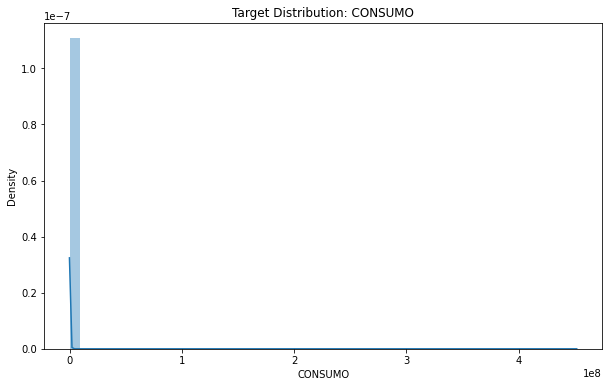

<Figure size 2160x1080 with 0 Axes>

In [ ]:
sns.distplot(y)
plt.title('Target Distribution: '+target)
plt.figure(figsize=(30,15))
plt.show()

In [ ]:
y.describe()

count    1.603080e+05
mean     1.969344e+04
std      1.267888e+06
min      1.000000e+00
25%      1.710000e+02
50%      1.003000e+03
75%      8.430000e+03
max      4.514194e+08
Name: CONSUMO, dtype: float64

In [ ]:
X.describe()

,ID_CONTADOR,FECHA_DIA,FECHA_MES,FECHA_AÑO
count,160308.000000,160308.000000,160308.000000,160308.000000
mean,1624.735771,15.618447,6.673722,2020.078318
std,990.511922,8.810777,3.340697,0.776822
min,0.000000,1.000000,1.000000,2019.000000
25%,829.000000,8.000000,4.000000,2019.000000
50%,1536.000000,15.000000,7.000000,2020.000000
75%,2422.000000,23.000000,10.000000,2021.000000
max,3469.000000,31.000000,12.000000,2021.000000


In [ ]:
X

,USO,ID_CONTADOR,LOCALIDAD,FECHA_NOMBREDIA,FECHA_DIA,FECHA_MES,FECHA_AÑO,Temp_Media,Precipitación
1454513,INDUSTRIAL,475,BARCELONA,Saturday,4,9,2021,23.0,23.3
1156735,INDUSTRIAL,1860,BARCELONA,Thursday,25,3,2021,12.1,7.7
1122384,INDUSTRIAL,994,BARCELONA,Monday,15,2,2021,11.6,26.5
1381791,INDUSTRIAL,162,BARCELONA,Friday,20,8,2021,24.5,8.3
1464174,INDUSTRIAL,711,BARCELONA,Tuesday,14,9,2021,23.0,23.3
...,...,...,...,...,...,...,...,...,...
69616,INDUSTRIAL,2992,BARCELONA,Sunday,10,3,2019,13.5,0.3
805640,INDUSTRIAL,1948,BARCELONA,Tuesday,4,8,2020,25.5,12.4
837184,INDUSTRIAL,2265,BARCELONA,Friday,21,8,2020,25.5,12.4
879798,INDUSTRIAL,1047,BARCELONA,Thursday,24,9,2020,21.7,60.2


In [ ]:
cat = merged_df.select_dtypes(include='object').columns

In [ ]:
 for i in cat:
  X[i] = X[i].str.upper()

In [ ]:
for i in cat:
  print(merged_df[i].value_counts())

In [ ]:
num = merged_df.select_dtypes(include='int64').columns

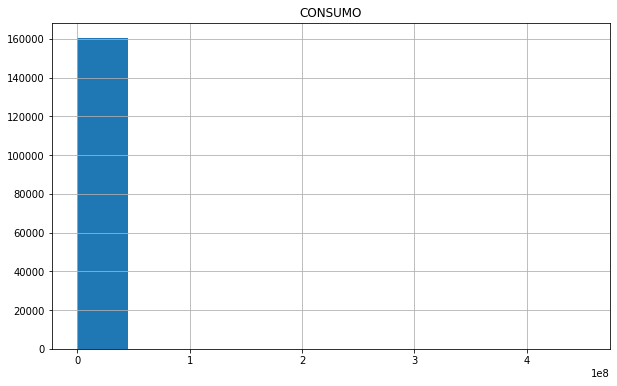

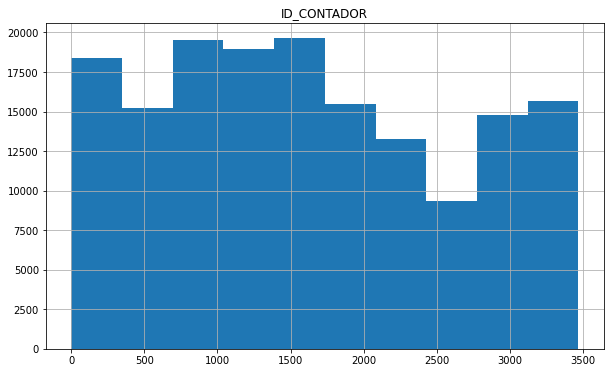

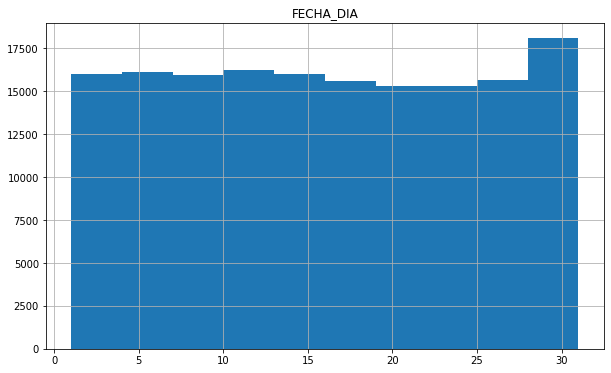

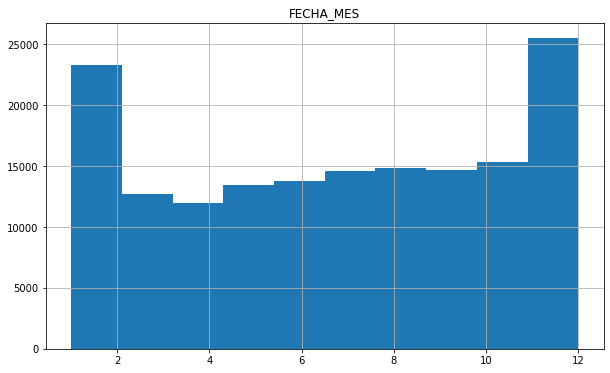

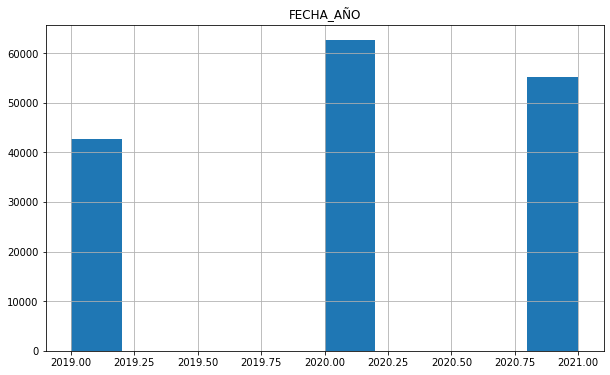

In [ ]:
for i in num: 
  merged_df.hist(i)

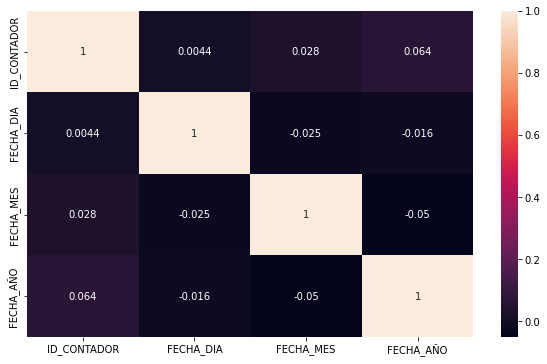

In [ ]:
sns.heatmap(X.corr(),annot=True)
plt.show()

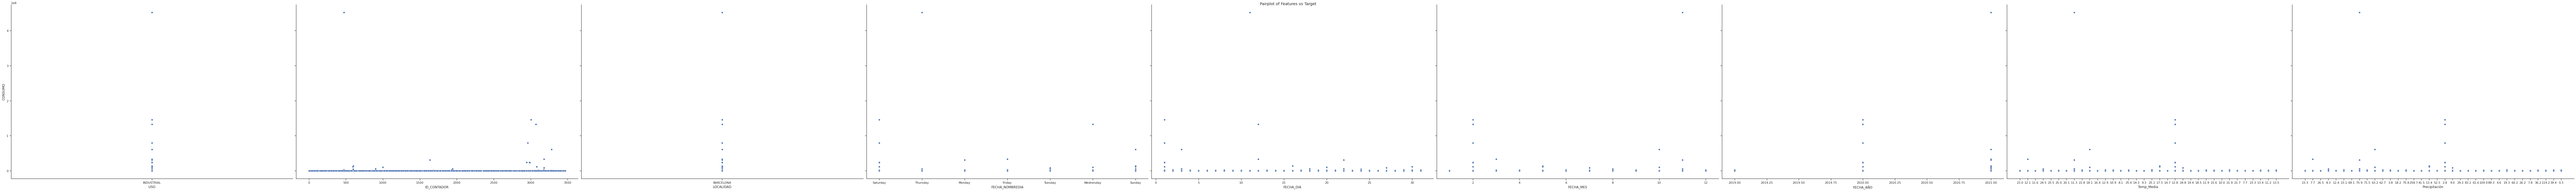

In [ ]:
#Dispersion target-variable
#sns.pairplot(df,x_vars=features, y_vars=target, size=8, aspect=1)
#plt.show()
#Esto lo cambie desde chatGPT 

sns.set(style="ticks", color_codes=True)

# Assuming that `df` is your DataFrame, `features` is a list of feature names,
# and `target` is the target variable name
g = sns.pairplot(merged_df, x_vars=features, y_vars=target, height=10, aspect=1.5)

# Add a title to the plot
g.fig.suptitle("Pairplot of Features vs Target")

# Show the plot
plt.show()

In [ ]:
#One hot encoding
cat = list(merged_df.select_dtypes(include='object').columns)
print('Variables categoricas a encodear:', cat)

Variables categoricas a encodear: ['USO', 'LOCALIDAD', 'FECHA_NOMBREDIA', 'Temp_Media', 'Precipitación']


In [ ]:
merged_df = pd.get_dummies(merged_df)

In [ ]:
cat = list(merged_df.select_dtypes(include='object').columns)
print('Total categoricas:', len(cat))

Total categoricas: 0


In [ ]:
merged_df.head()

,CONSUMO,ID_CONTADOR,FECHA_DIA,FECHA_MES,FECHA_AÑO,USO_INDUSTRIAL,LOCALIDAD_BARCELONA,FECHA_NOMBREDIA_Friday,FECHA_NOMBREDIA_Monday,FECHA_NOMBREDIA_Saturday,...,Precipitación_69.1,Precipitación_7.7,Precipitación_7.8,Precipitación_71.5,Precipitación_75.8,Precipitación_75.9,Precipitación_8.3,Precipitación_83.2,Precipitación_89.3,Precipitación_9.0
1454513,11190,475,4,9,2021,1,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1156735,836,1860,25,3,2021,1,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1122384,5850,994,15,2,2021,1,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1381791,11,162,20,8,2021,1,1,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1464174,557,711,14,9,2021,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


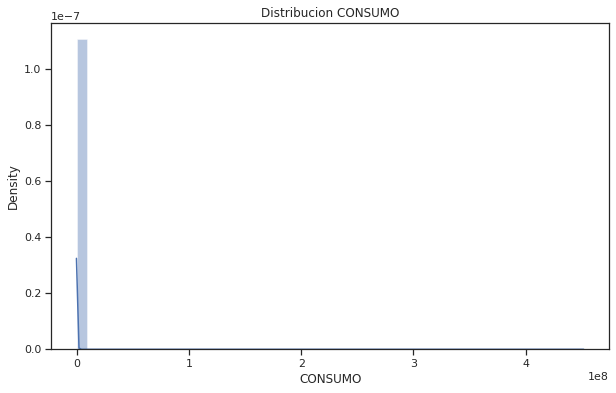

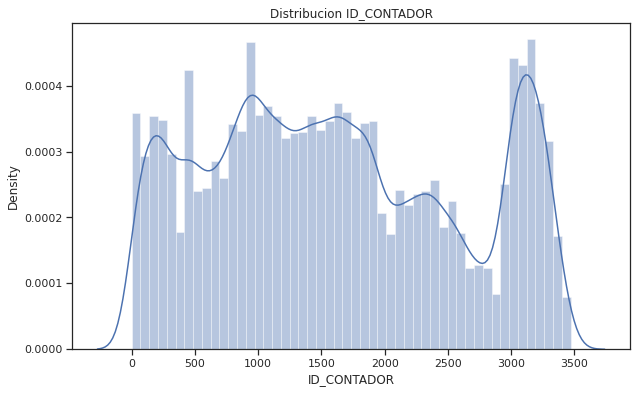

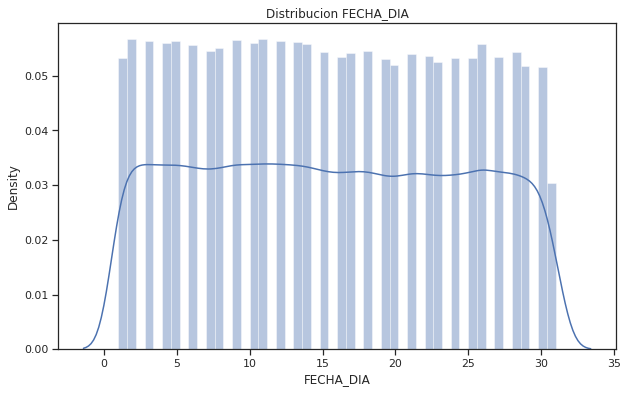

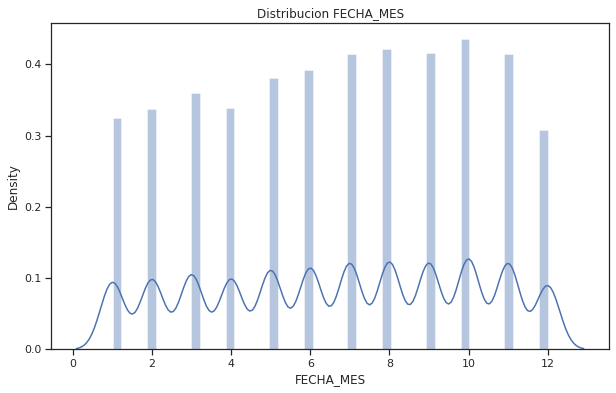

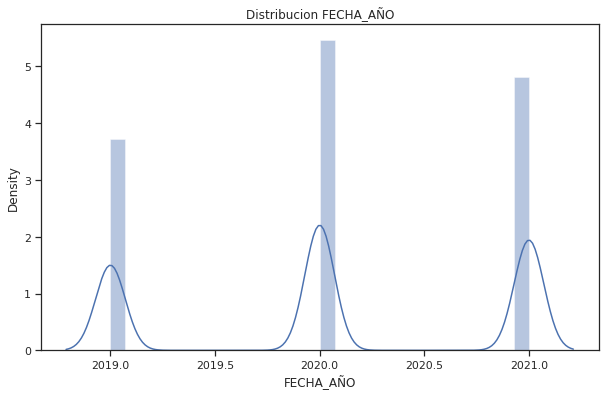

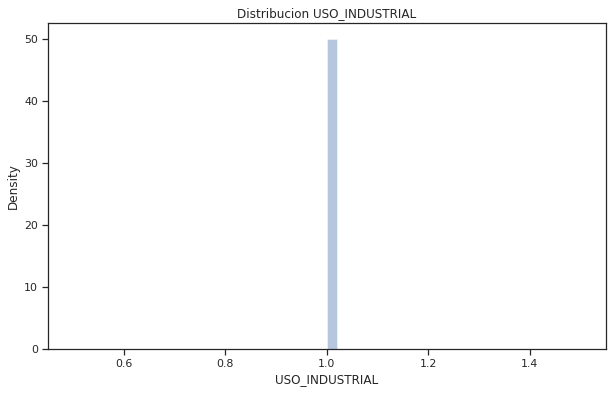

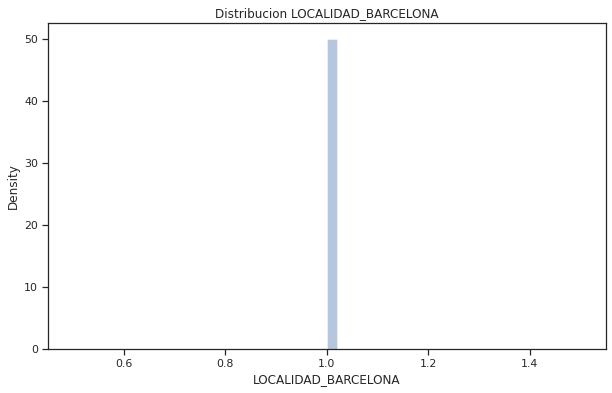

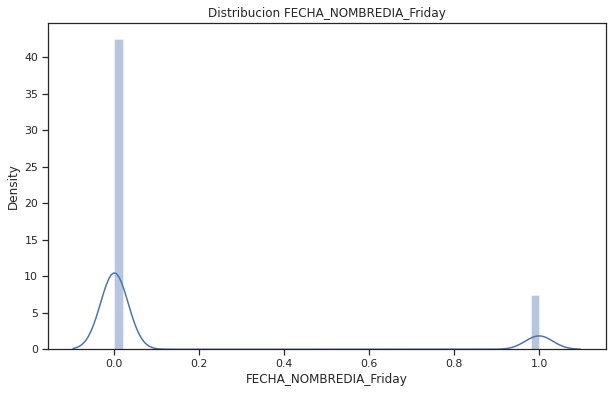

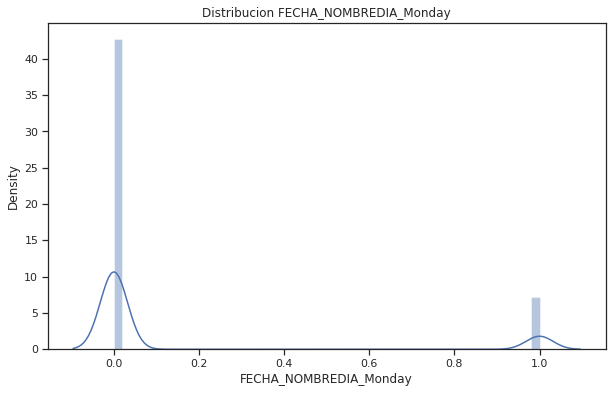

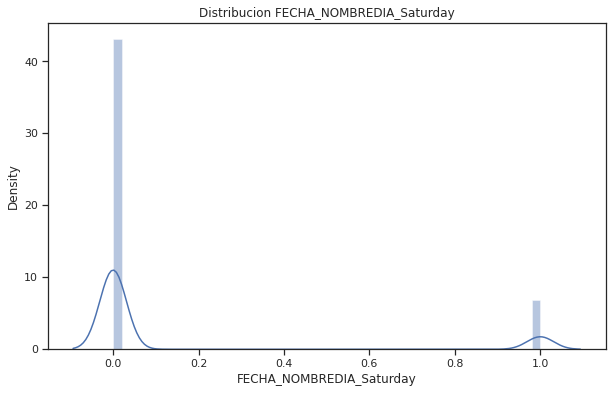

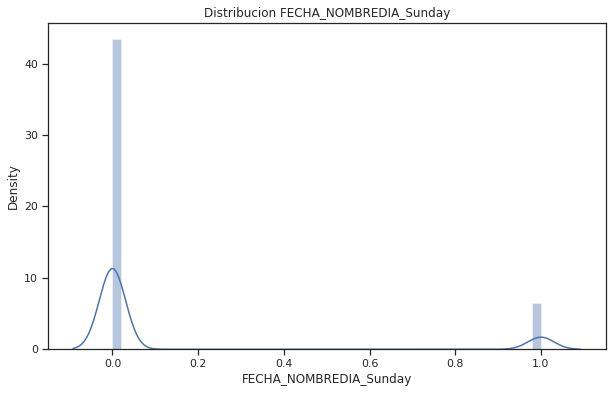

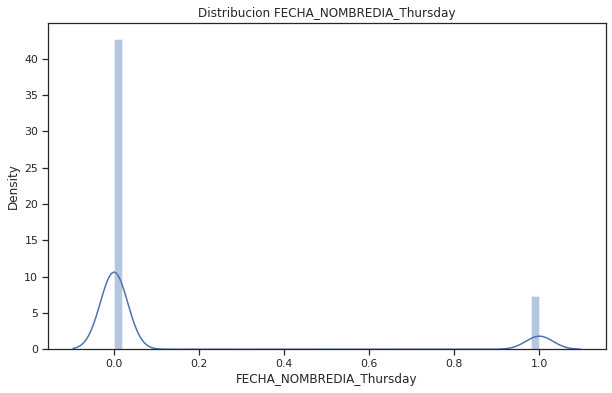

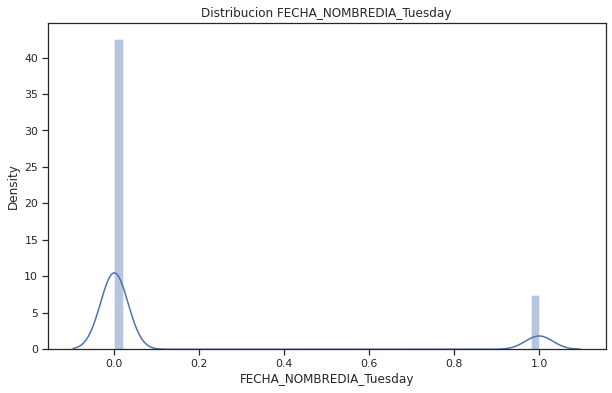

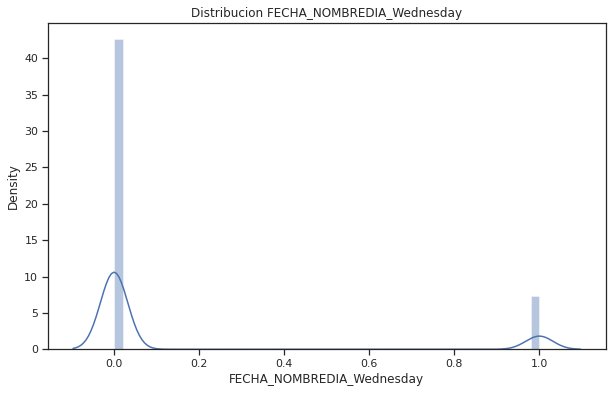

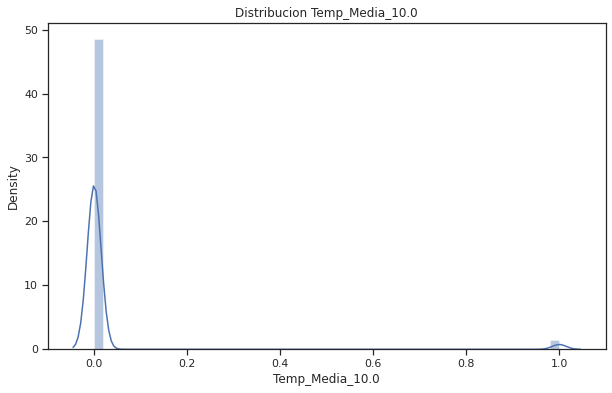

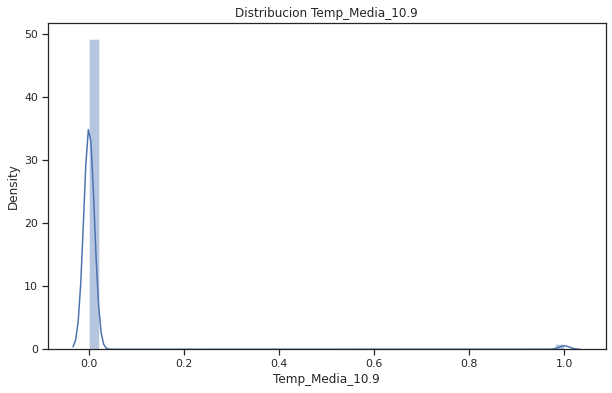

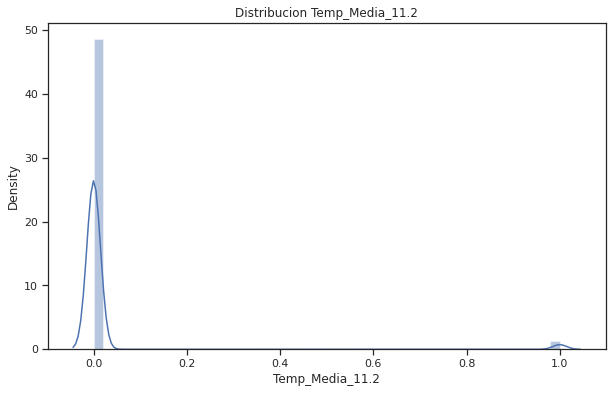

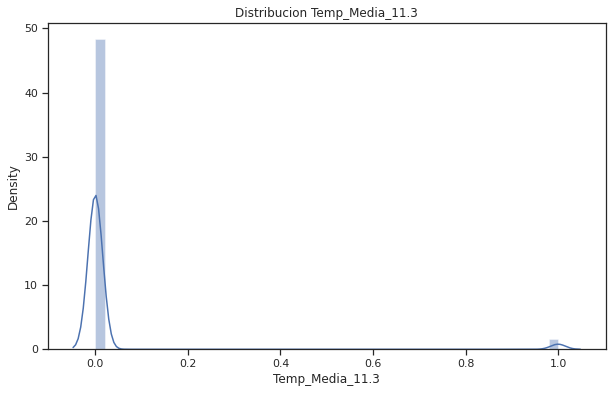

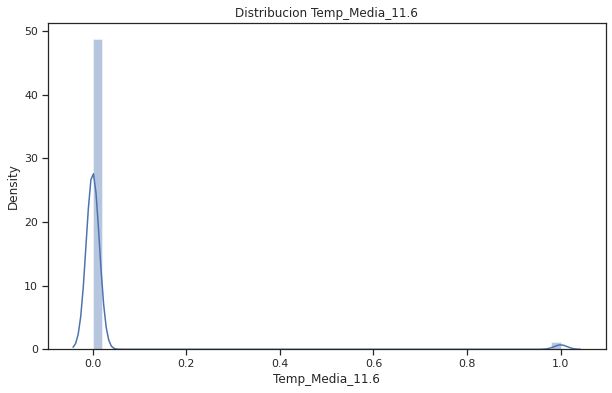

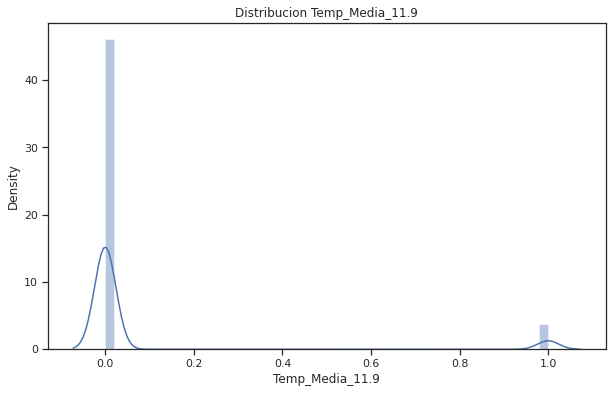

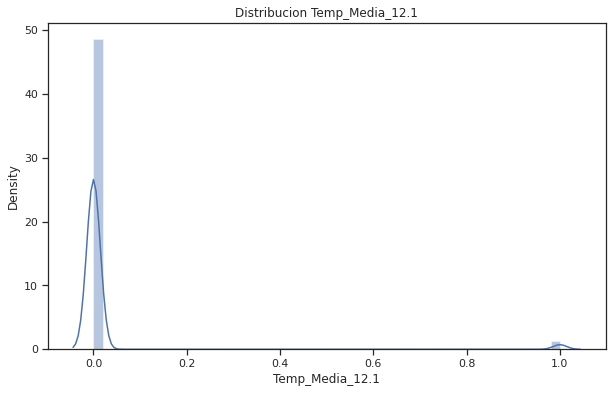

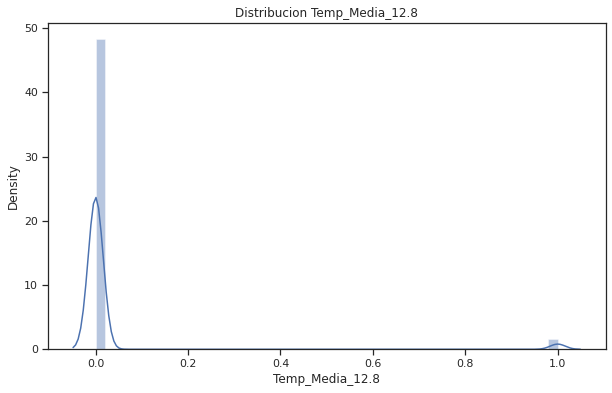

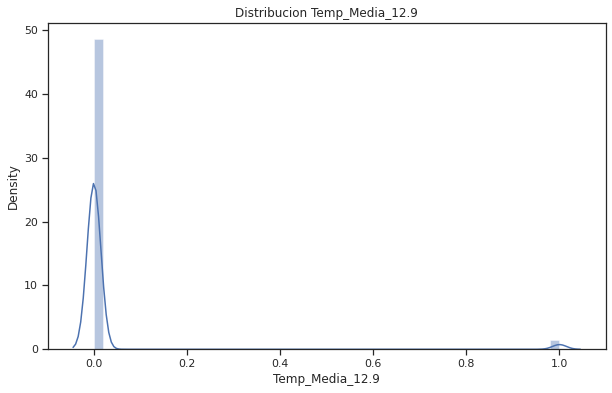

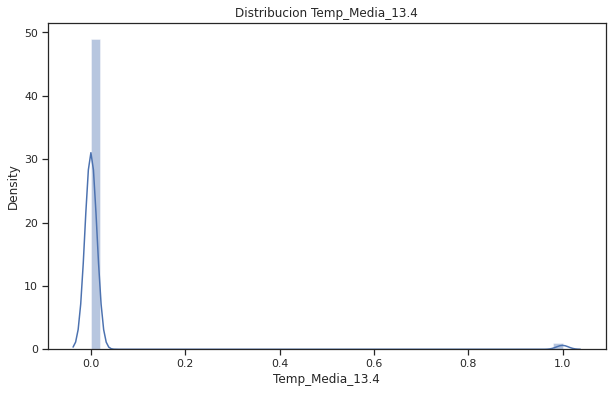

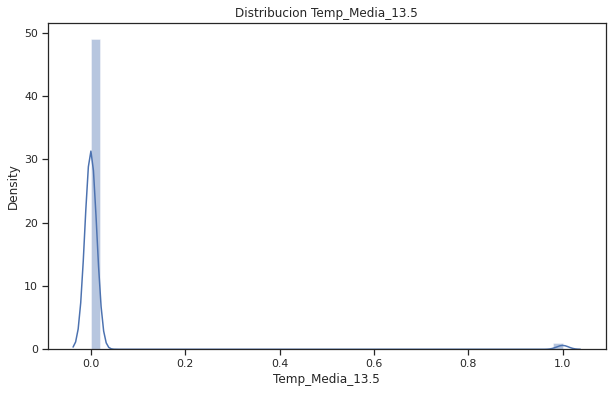

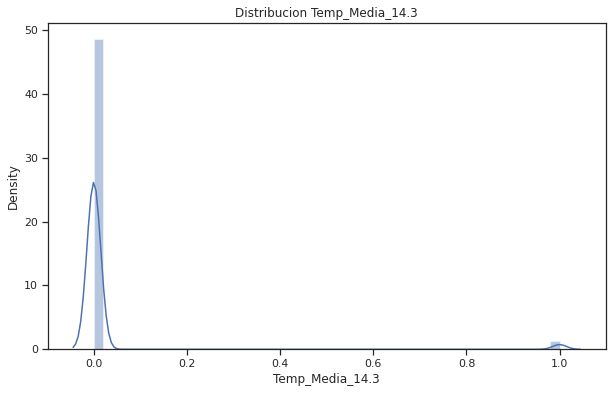

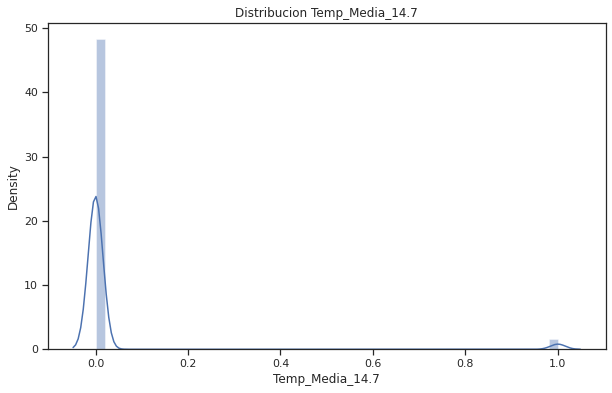

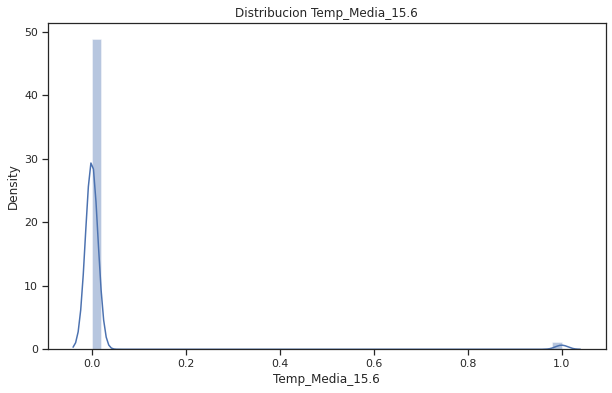

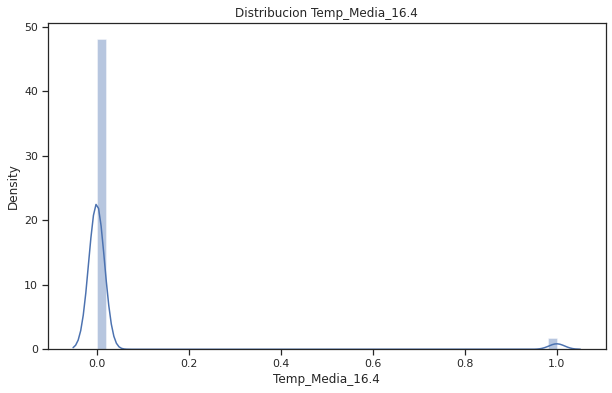

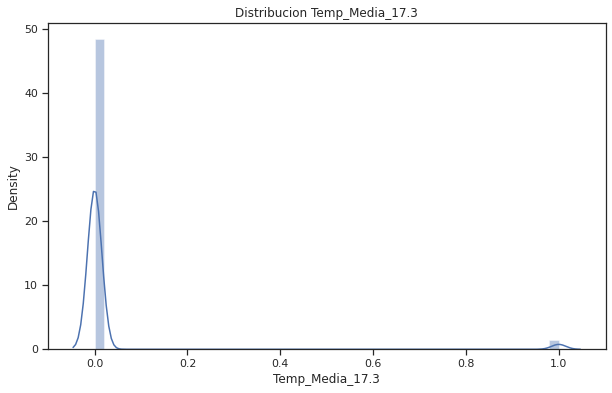

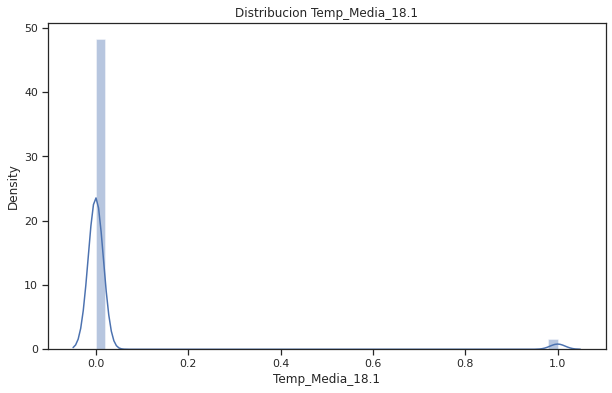

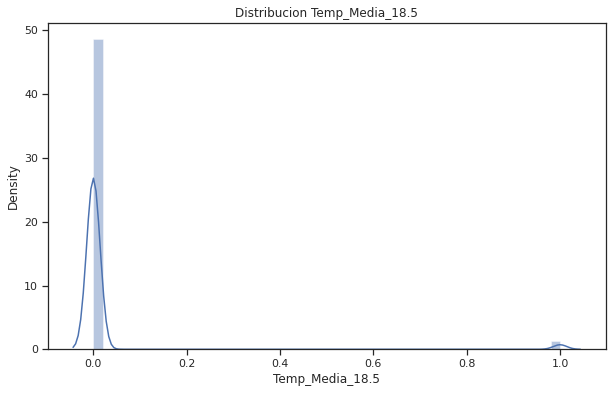

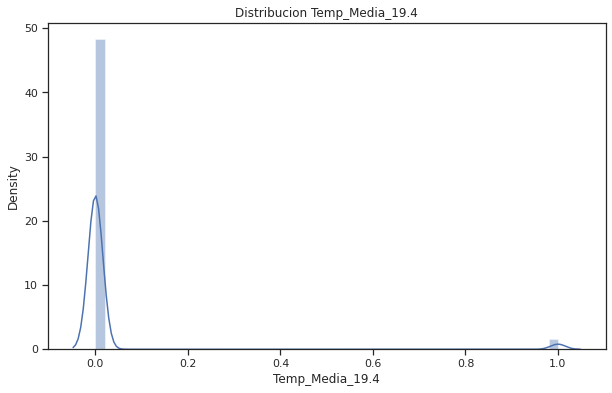

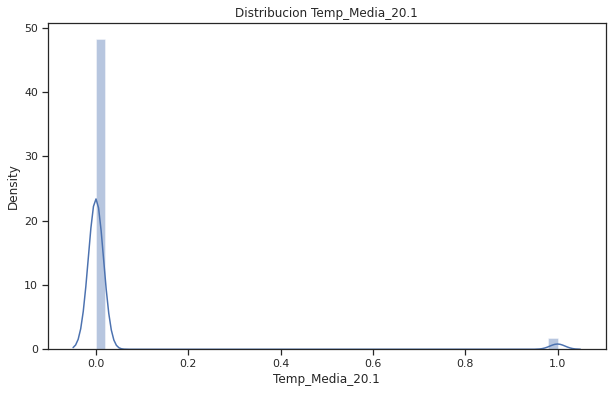

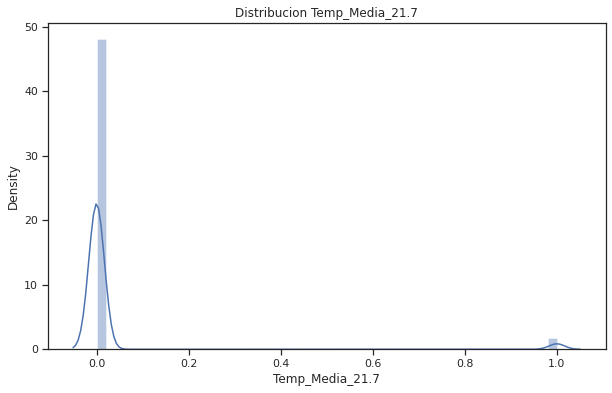

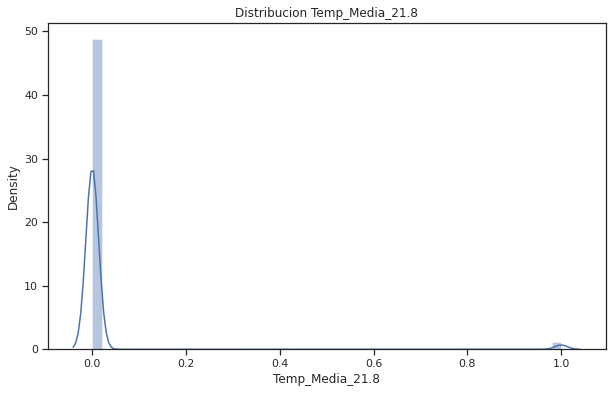

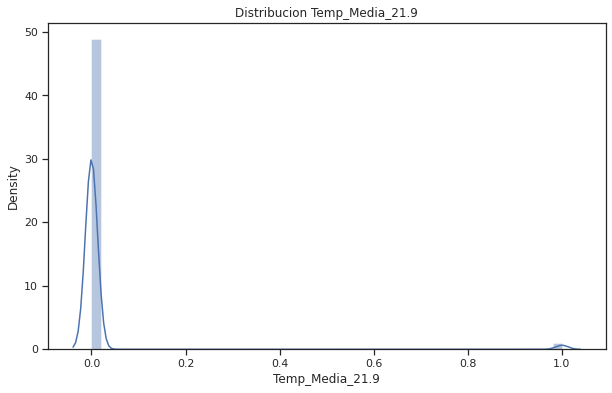

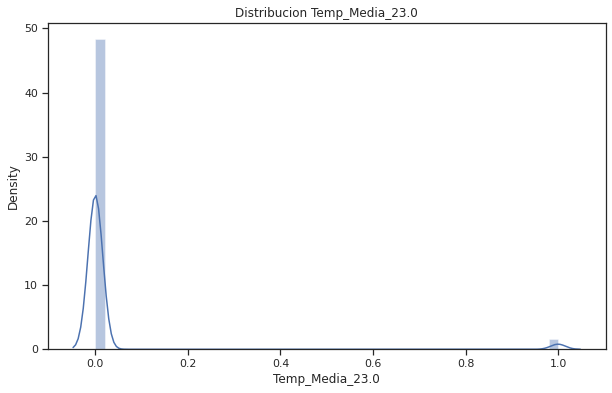

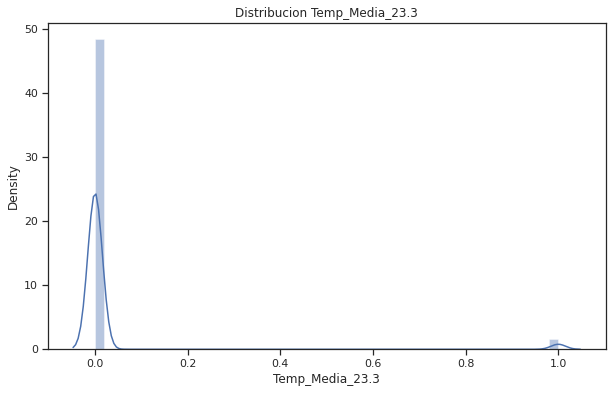

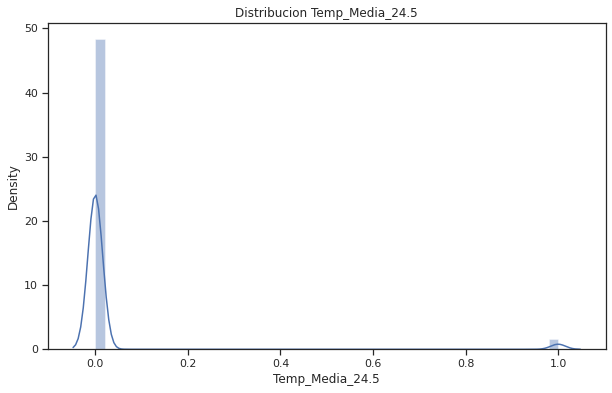

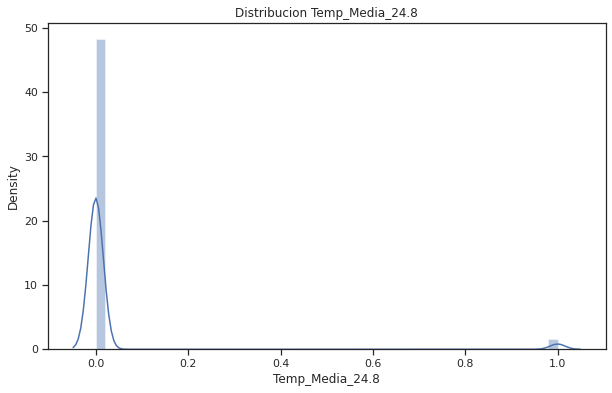

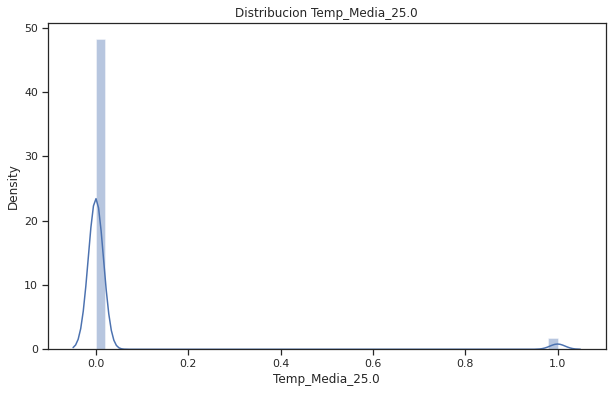

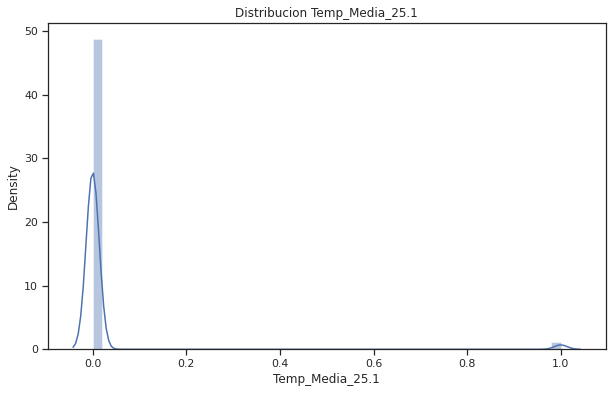

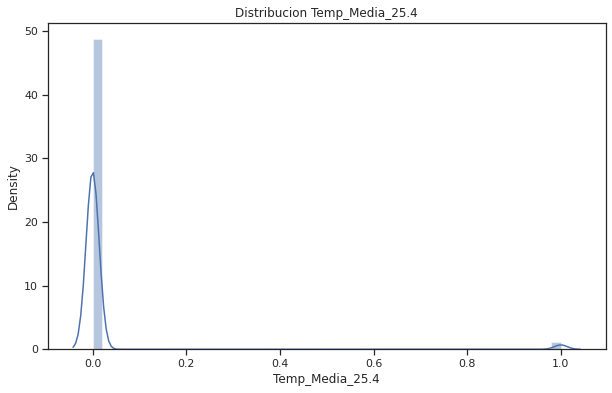

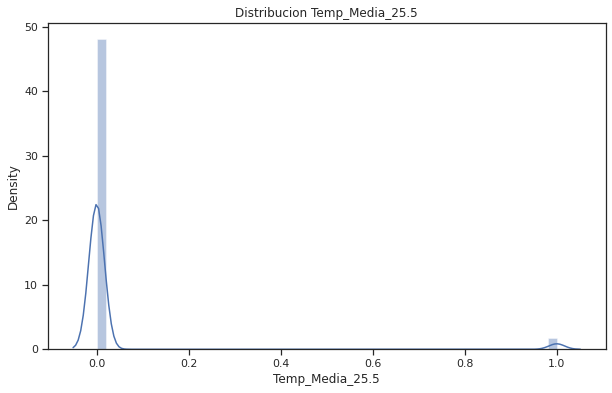

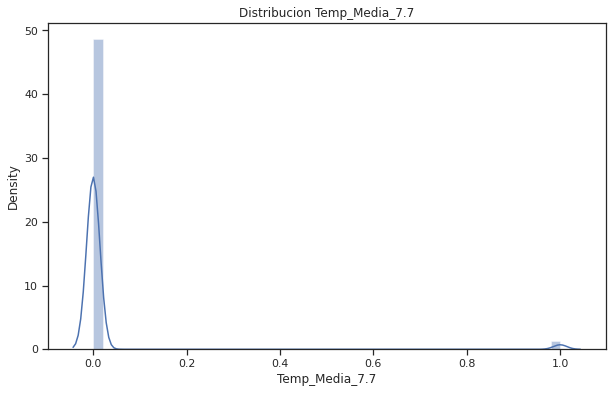

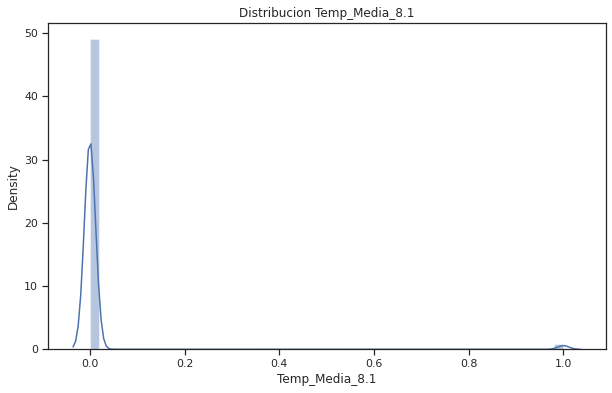

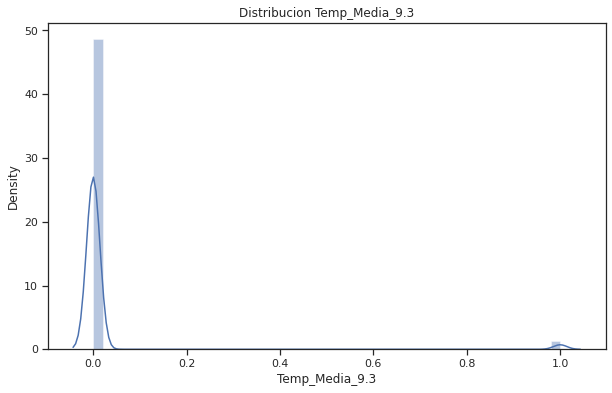

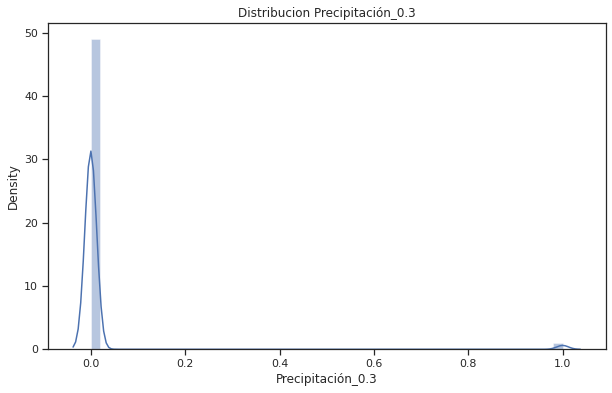

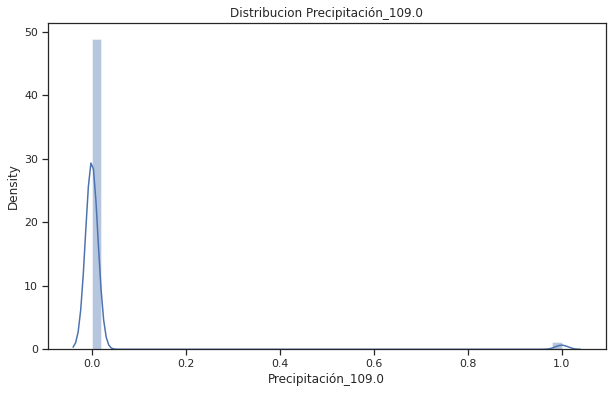

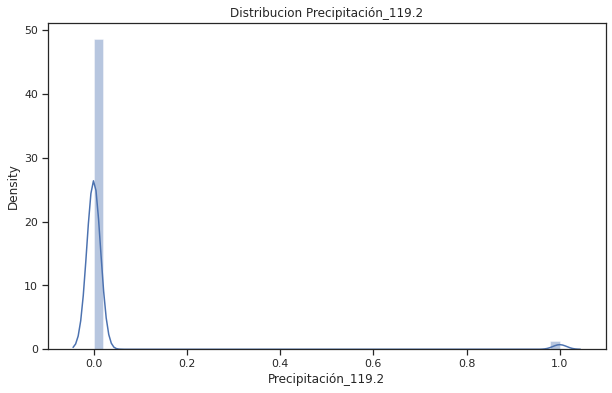

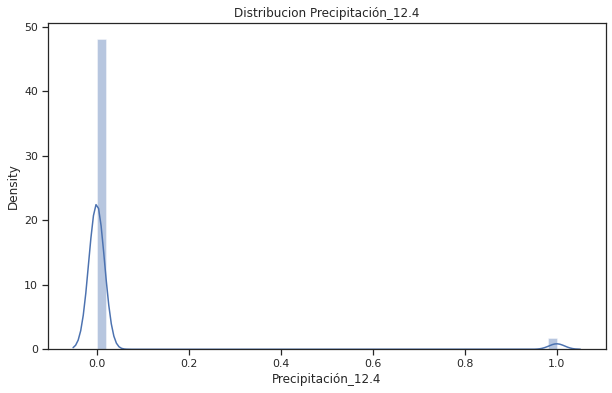

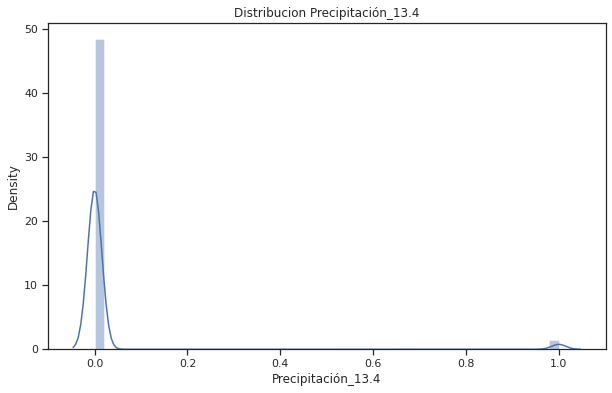

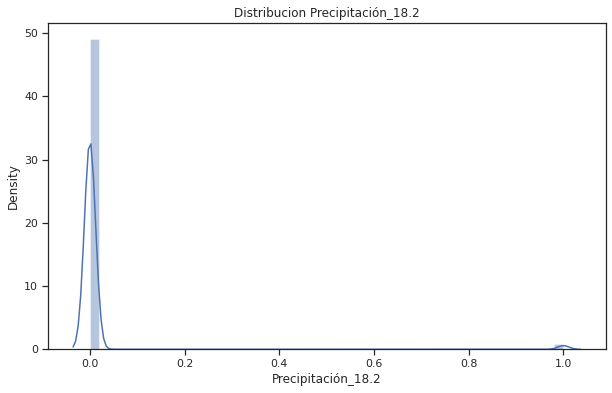

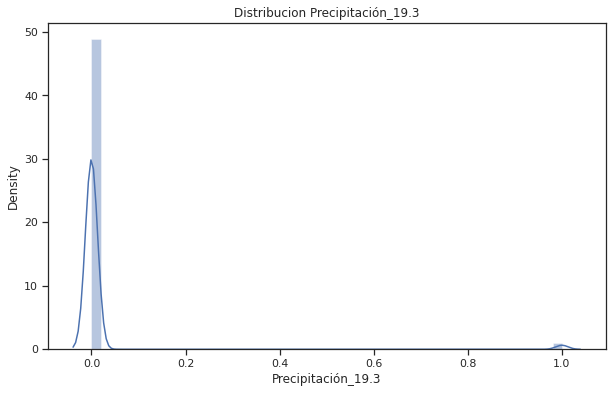

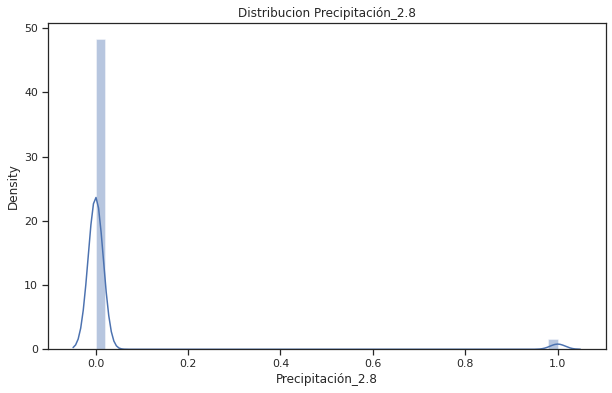

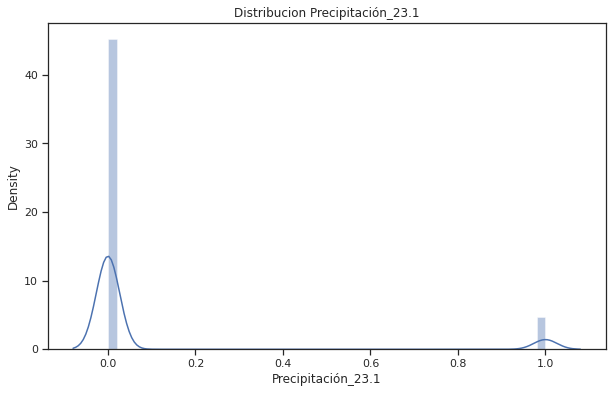

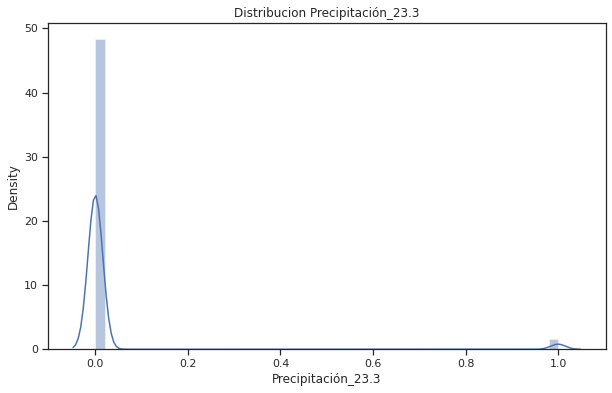

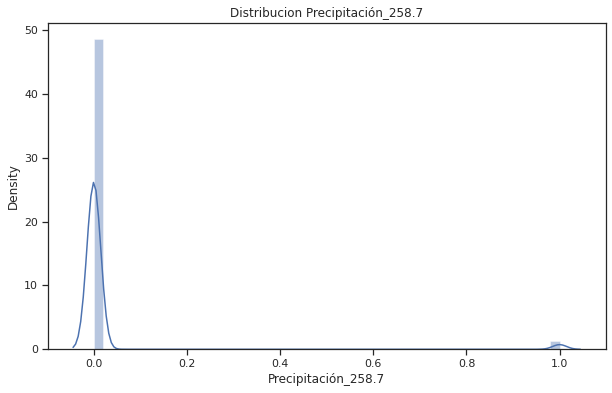

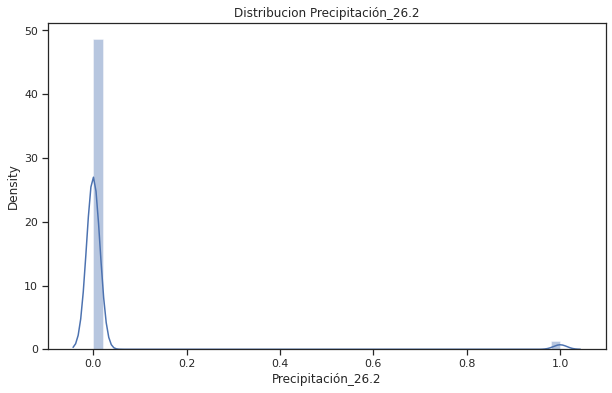

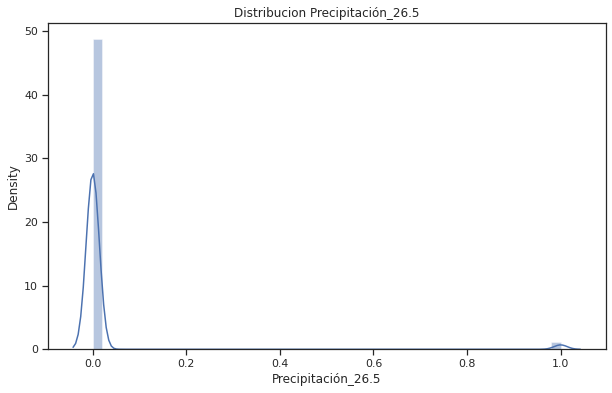

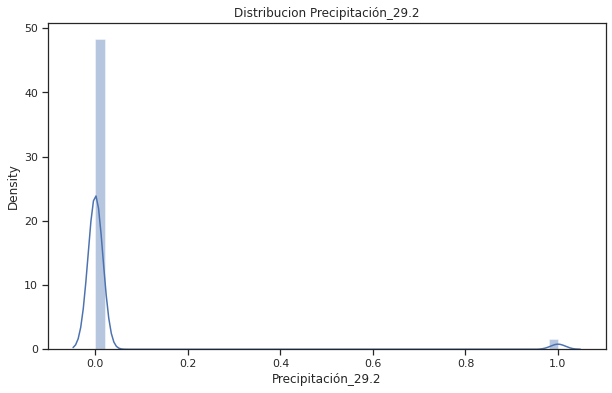

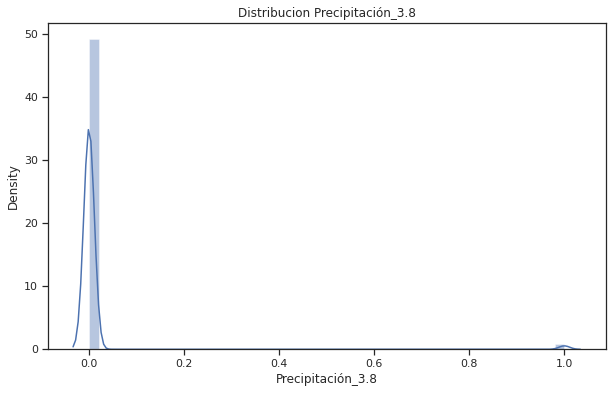

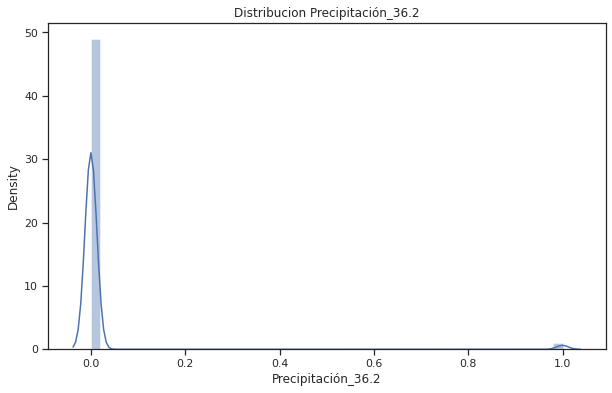

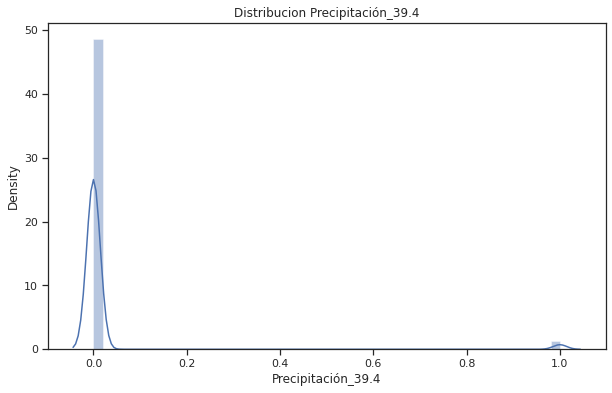

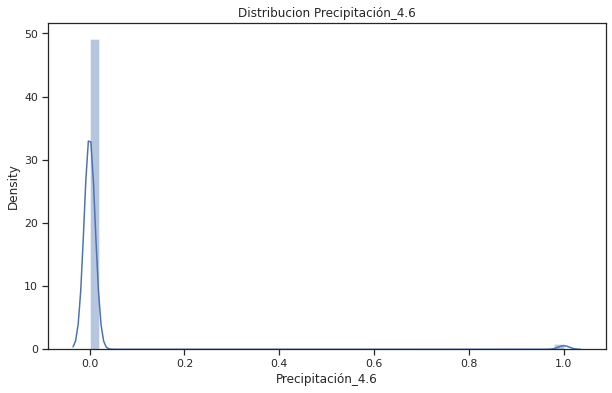

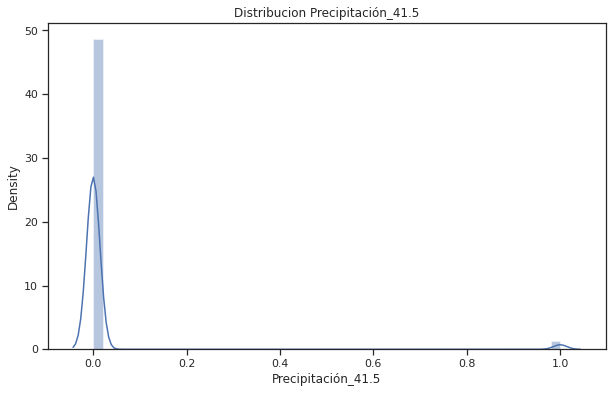

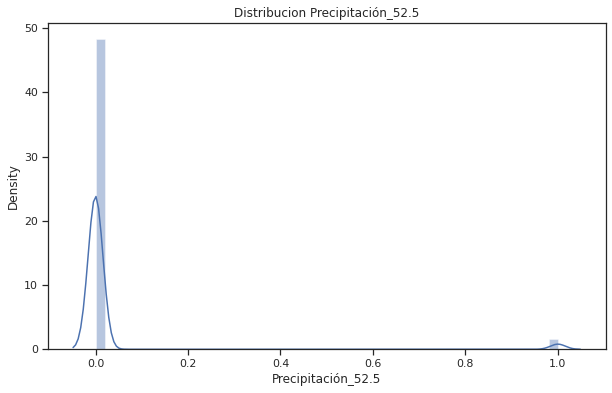

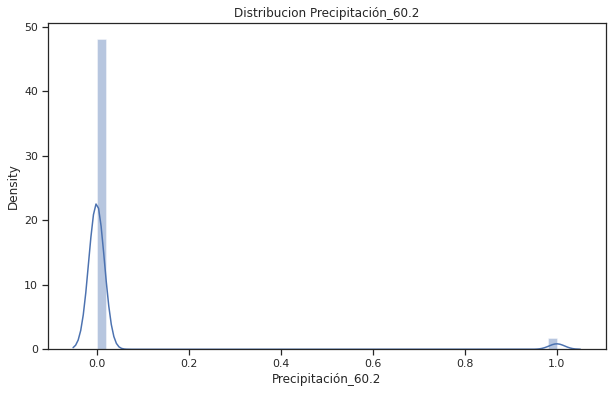

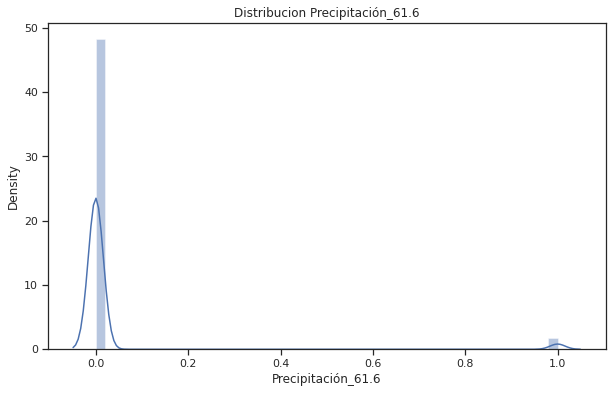

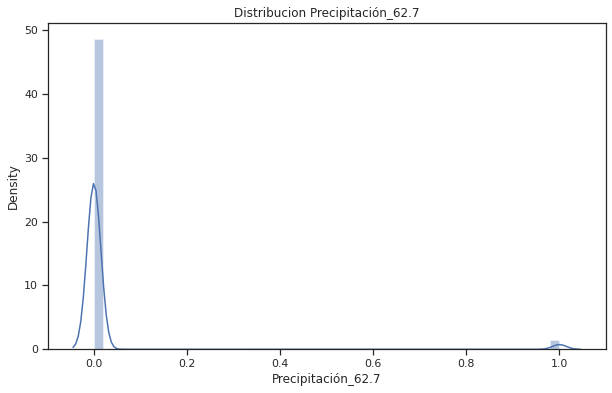

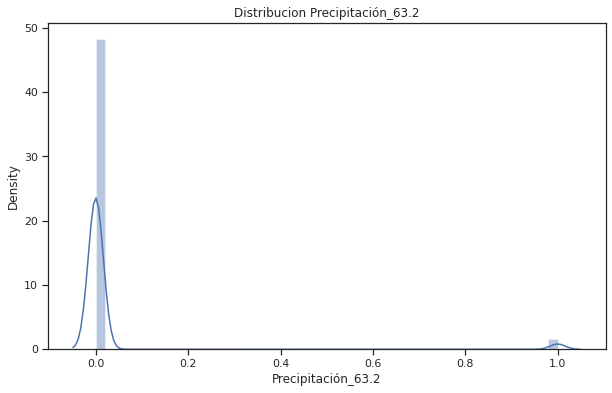

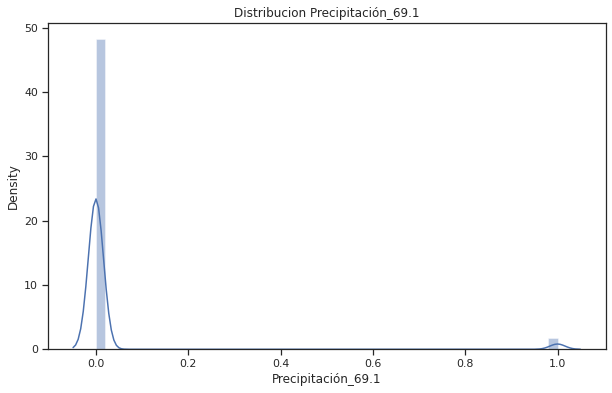

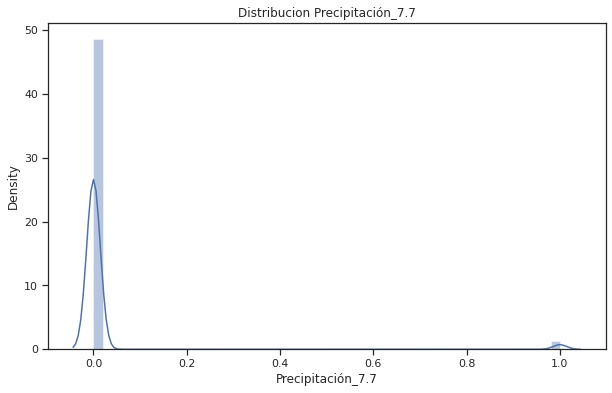

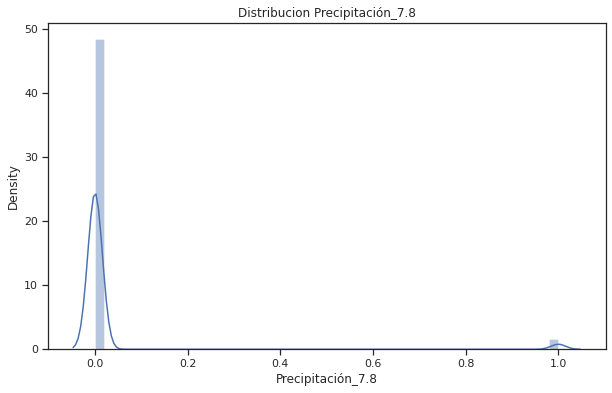

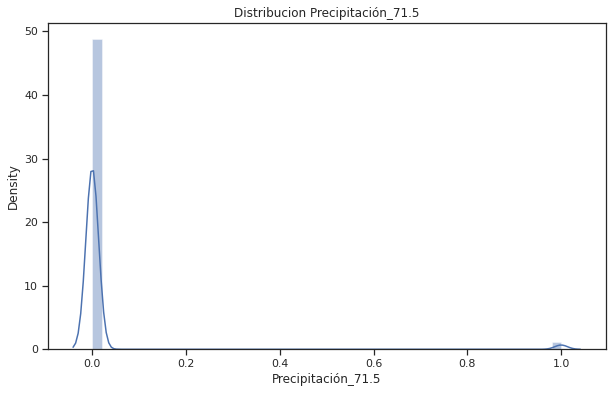

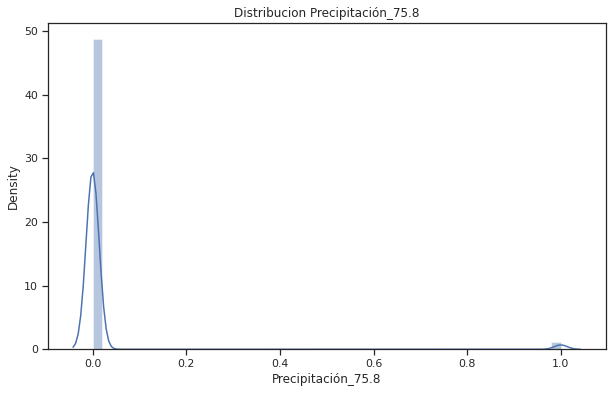

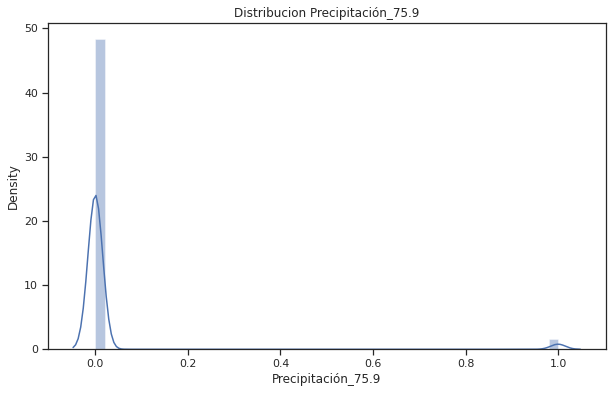

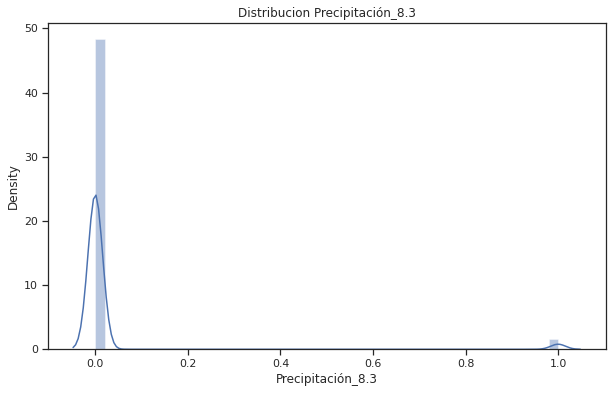

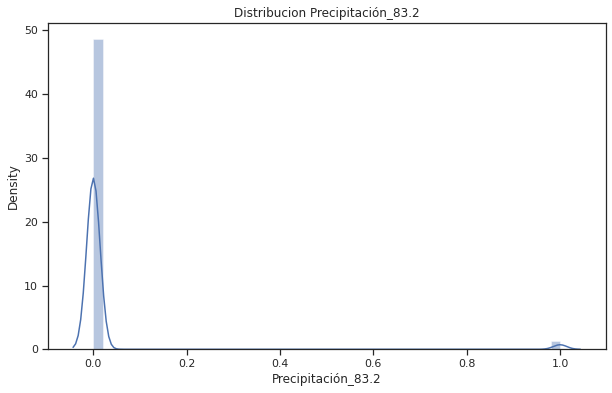

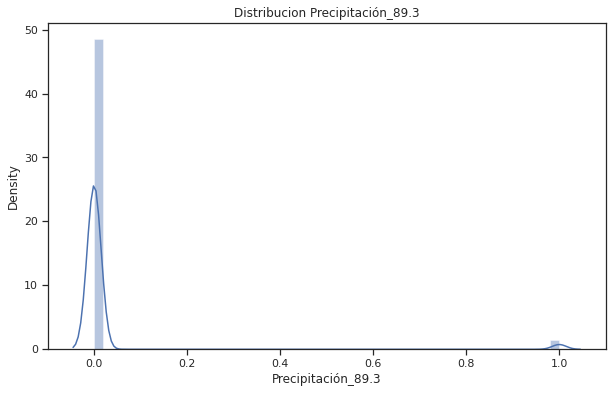

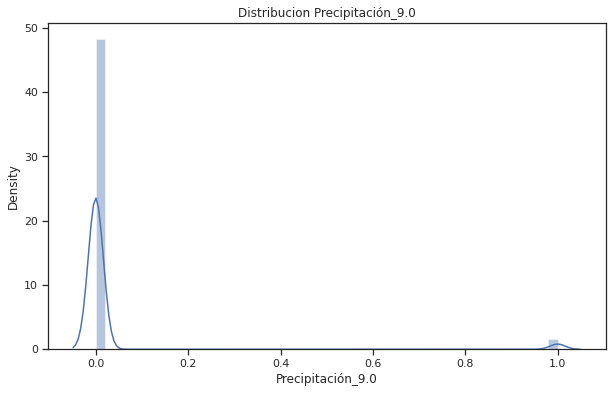

In [ ]:
for i in merged_df:
  sns.distplot(merged_df[i])
  plt.title('Distribucion '+i)
  plt.show()

In [ ]:
# SEPARACION X - Y ############# #CLAVE HACERLO POR SEGUNDA VEZ!!!!

features = merged_df.columns[merged_df.columns != target]
y = merged_df[target]
X = merged_df[features]

In [ ]:
# Divide X-y en Train (85%) y Test (15%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=40)

In [ ]:
#Estandarización: fit_transform() en train, transform() en test
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# ### Igualamos con Eve ##
X_train = pd.DataFrame(X_train, columns = features)
X_test = pd.DataFrame(X_test, columns = features)

### Eliminar variables baja varianza

In [ ]:
# vt = VarianceThreshold(threshold = 0.01) #Eliminamos columnas donde el 99% de los valores son iguales
# vt.fit(X)

# cols_lowvar = X.columns[vt.get_support()==False]
# X.drop(columns=cols_lowvar,inplace=True)

# print(len(cols_lowvar),' low variance features were removed:\n', cols_lowvar.to_list())

## A POR EL MODELO

In [ ]:
model = LinearRegression()
-np.mean(cross_val_score(model, X_train, y_train, cv=5, scoring='neg_root_mean_squared_error'))

1068856.0527047017

In [ ]:
def RMSE(model,X,y):
  return round(np.sqrt(np.mean((y-model.predict(X))**2)),2)
  
def cross_val(model,X,y):
  Kfold_rmse = cross_val_score(model, X, y, cv=5, scoring='neg_root_mean_squared_error')
  return round(-Kfold_rmse.mean(),2)

In [ ]:
# Funcion que devuelve un dataframe con resultados de RMSE Cross Validation
def AUC(model,X,y):
  return roc_auc_score(y,model.predict_proba(X)[:,1])

def cross_validation(model,X,y):
  Kfold_metric = cross_val_score(model, X, y, cv=4, scoring='roc_auc')
  return Kfold_metric.mean()
  
# Inicializa resultados
label_ = []
rmse_train_ = []
rmse_valida_ = []

# Funcion que devuelve un dataframe con resultados de RMSE Cross Validation
def evaluate_regression(label,model, X, y, verbose=True, cv=True):

  model.fit(X,y)
  rmse_train = RMSE(model,X,y)
  cross_valida = cross_val(model,X,y)
  
  label_.append(label)
  rmse_train_.append(rmse_train)
  if cv==True:
    rmse_valida_.append(cross_valida)
  else:
    rmse_valida_.append(-1)
  
  if verbose==True:
    return pd.DataFrame({'Model': label_,
                       'RMSE Train': rmse_train_,
                       'RMSE Cross-Valida': rmse_valida_
                       }).sort_values('RMSE Cross-Valida')

In [ ]:
evaluate_regression(label='XGBoost', 
                    model = xgb.XGBRegressor(objective ='reg:squarederror'), 
                    X=X_train, y=y_train)

,Model,RMSE Train,RMSE Cross-Valida
0,XGBoost,41528.47,1468950.26


In [ ]:
poly_reg = PolynomialFeatures(degree=3)

X_train_poly = poly_reg.fit_transform(X_train)
X_test_poly = poly_reg.fit_transform(X_test)
X_pol = poly_reg.transform(X)

In [ ]:
X_train_poly.shape

In [ ]:
model = LinearRegression()
model.fit(X_train_poly, y_train)

In [ ]:
evaluate_regression(label='Polynomial 2d', 
                    model = LinearRegression(), 
                    X=X_train_poly, y=y_train)

In [ ]:
loss='squared_error', 
penalty='l2',
alpha=0.0001, 
l1_ratio=0.15, 
fit_intercept=True, 
max_iter=1000, 
tol=0.001, 
shuffle=True, 
verbose=0, 
#epsilon=DEFAULT_EPSILON, 
random_state=None, 
learning_rate='invscaling', 
eta0=0.01, 
power_t=0.25, 
early_stopping=False, 
validation_fraction=0.1, 
n_iter_no_change=5, 
warm_start=False, 
average=False

In [ ]:
learning_rates = np.logspace(-4, 0, 100)  # Define a list of possible float values for learning_rate

In [ ]:

parameters_hp = {
    'alpha': [0.0001, 0.001, 0.01],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'max_iter': [1000, 2000, 3000],
    'tol': [0.0001, 0.001, 0.01],
    'eta0': [0.01, 0.1, 1],
    'learning_rate': learning_rates  # Use the list of possible float values
}

In [ ]:
# Define XGBoost model with fixed hyperparameters
xgb_model = XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=100)

In [ ]:
search_hp = RandomizedSearchCV(estimator=xgb_model, 
                               param_distributions=parameters_hp,
                               scoring='neg_root_mean_squared_error',
                               cv=5, 
                               n_iter=50,          # increase number of iterations
                               n_jobs=-1, 
                               verbose=True, 
                               error_score='raise')

In [ ]:
# Fit the search object to the data
search_hp.fit(X_train, y_train)

In [ ]:
print("---- Results from Random Search -----" )
print("\n The best estimator across ALL searched params:", search_hp.best_estimator_)
print("\n The best RMSE:", -search_hp.best_score_)
print("\n The best parameters across ALL searched params:\n", search_hp.best_params_)


## MODELO FINAL

In [ ]:
  model = search_hp.best_estimator_

In [ ]:
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:
error = y_test_pred - y_test.values

In [ ]:
mae = np.mean(np.abs(error))
mape = np.mean(error/y_test)
mse = np.mean(error**2)
rmse = np.sqrt(np.mean(error**2))

print('RMSE:', round(rmse,4))
print('MAE:', round(mae,4))
print('MAPE: {:.3%}'.format(mape))
print('R2-Score: {:.2%}'.format(r2_score(y_test, y_test_pred)))

In [ ]:
#Compara Prediccion vs dato real
plt.figure(figsize=[10,6])
plt.scatter(y_test,y_test_pred)
plt.plot(y_test,y_test,'r')
plt.title('True vs Predicted')
plt.xlabel('True values')
plt.ylabel('Predicted values')
plt.legend(['Regresion Ideal (0% Error)','Nuestra Regresión'])
plt.show()

In [ ]:
sns.set(rc={'figure.figsize':(12,6)})
sns.distplot(error).set_title('Distribucion Error')
plt.show()

In [ ]:
round(pd.Series(error).describe(),2)

In [ ]:
confidence=95
z = (100-confidence)/2
print("Intervalo del error (confianza",confidence,"%):",round(np.percentile(error, 100-z),1),"/",round(np.percentile(error, z),1))

## INTERPRETABILIDAD


In [ ]:
importances = model.feature_importances_

In [ ]:
feature_names = X_train.columns
importance_dict = dict(zip(feature_names, importances))

In [ ]:
df_importances = pd.DataFrame({'FEATURE': feature_names, 'IMPORTANCE': importances}).sort_values('IMPORTANCE',ascending=False)
df_importances = sns.barplot(data=df_importances, y='FEATURE',x='IMPORTANCE',color='skyblue')
plt.title('Feature importance')
plt.show()

In [ ]:
# Obtener las predicciones del modelo
y_pred = model.predict(X)

# Comparar las predicciones con los valores reales
df = pd.DataFrame({'Actual': y, 'Predicted': y_pred})
print(df.head())

# Calcular la precisión del modelo
accuracy = model.score(X, y)
print('Precisión del modelo:', accuracy)

## SAVE EL MODEL

In [ ]:
import pickle

with open('/content/gdrive/MyDrive/Colab Notebooks/Recta final/model/model.pkl', 'wb') as file:
    pickle.dump(model, file)


